Followed a tutorial by NeuralNine for this

Importing the libraries 

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


importing the dataset directly from tensorflow's sets

In [2]:
mnist = tf.keras.datasets.mnist

Creating and normalizing our training and testing sets

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

Creating our model(type, activation function, and certain layers)

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

C:\Users\rapha\anaconda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

finally fitting the model (epochs is how many times the model will see the same data)

In [6]:
model.fit(x_train, y_train, epochs = 3)
model.save("handwritten.keras")

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8635 - loss: 0.4740
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9653 - loss: 0.1123
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9774 - loss: 0.0730


In [7]:
model = tf.keras.models.load_model('handwritten.keras')

Evaluating the model

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.9639 - loss: 0.1221
0.10571003705263138
0.968999981880188


Finally testing my model on some of my handwritten notes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This digit is probably a 1


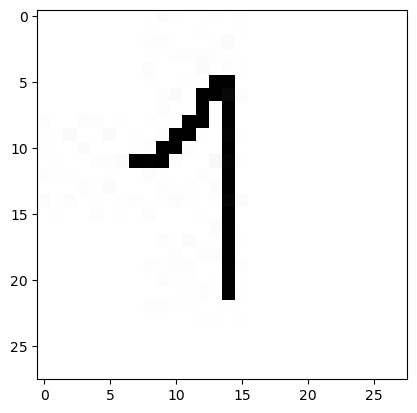

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
This digit is probably a 2


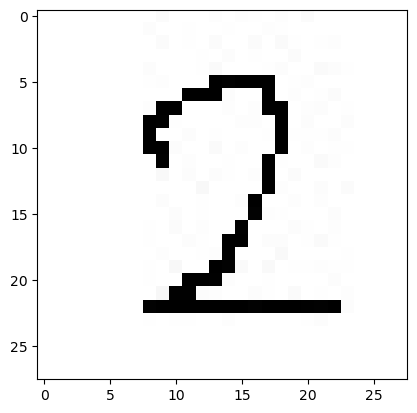

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
This digit is probably a 3


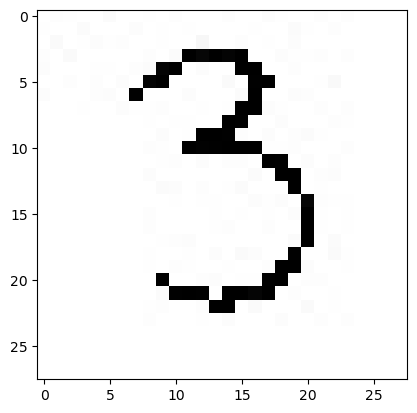

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
This digit is probably a 4


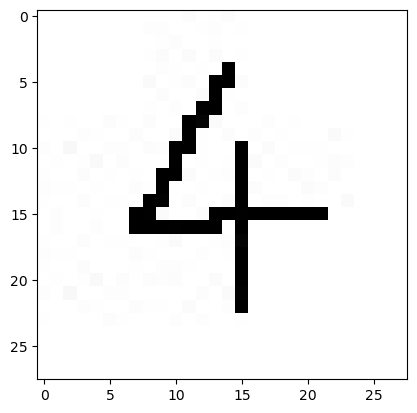

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
This digit is probably a 5


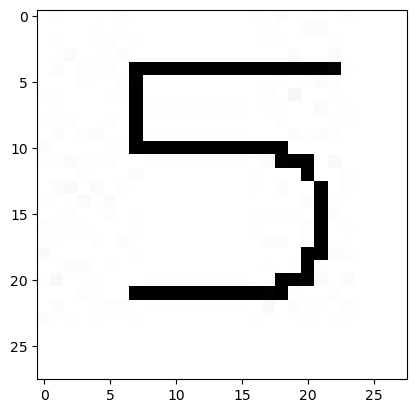

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
This digit is probably a 6


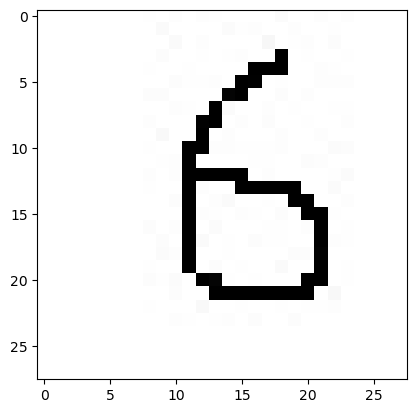

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
This digit is probably a 7


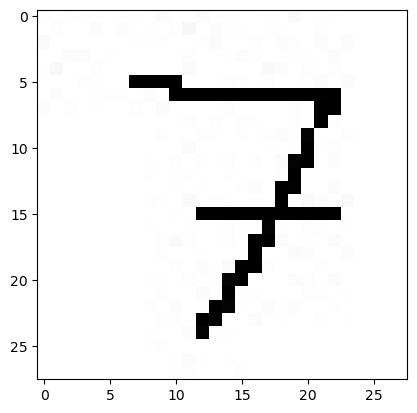

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
This digit is probably a 6


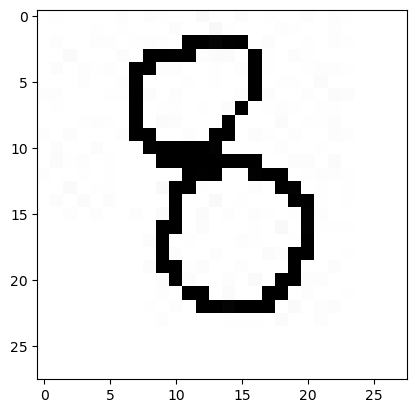

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
This digit is probably a 9


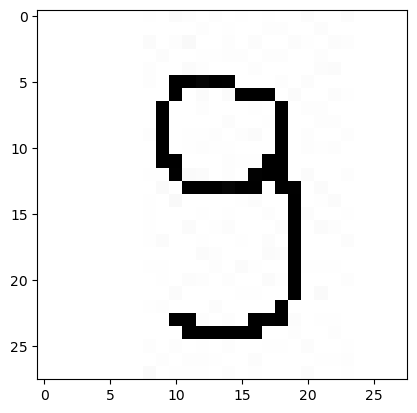

In [13]:
image_number = 1
while os.path.isfile(f"handwrittennumber/number{image_number}.jpg"):
    img = cv2.imread(f"handwrittennumber/number{image_number}.jpg") [ :,:, 0]
    img = np. invert(np.array([img]))
    prediction = model.predict(img)
    print(f"This digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt. show()
    image_number += 1